# Technical Analysis Demonstration

This notebook demonstrates the usage of the `TechnicalAnalyzer` class for analyzing stock price data using various technical indicators.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add project root to path to allow imports
sys.path.append('../..')

from tumkwe_invest.data_analysis.technical_analysis import TechnicalAnalyzer

## Loading Sample Data

We'll use sample stock price data to demonstrate the technical analysis functionality.

In [2]:
# Sample stock price data (you can replace this with real data)
# Generate some random price data for demonstration
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2020-01-01', periods=200, freq='D')
price_data = pd.DataFrame({
    'open': np.random.normal(100, 5, len(dates)),
    'high': None,
    'low': None,
    'close': None,
    'volume': np.random.normal(1000000, 200000, len(dates))
}, index=dates)

# Create a random walk for closing prices
random_walk = np.random.normal(0, 1, len(dates))
price_data['close'] = 100 + np.cumsum(random_walk)

# Set high and low based on close
price_data['high'] = price_data['close'] + np.abs(np.random.normal(0, 2, len(dates)))
price_data['low'] = price_data['close'] - np.abs(np.random.normal(0, 2, len(dates)))

price_data.head()

,open,high,low,close,volume
2020-01-01,102.483571,99.919550,96.529005,98.405572,1.071557e+06
2020-01-02,99.308678,99.650528,96.774108,97.806197,1.112157e+06
2020-01-03,103.238443,99.550653,97.619199,97.811441,1.216610e+06
2020-01-04,107.615149,100.569697,96.933871,97.858422,1.210760e+06
2020-01-05,98.829233,98.235226,96.539364,97.408356,7.244661e+05


## Creating a Technical Analyzer

Initialize the technical analyzer with our price data.

In [3]:
analyzer = TechnicalAnalyzer(price_data)
print(f"Analyzer initialized with {len(price_data)} days of price data")

Analyzer initialized with 200 days of price data


## Calculating Technical Indicators

Let's calculate various technical indicators and visualize them.

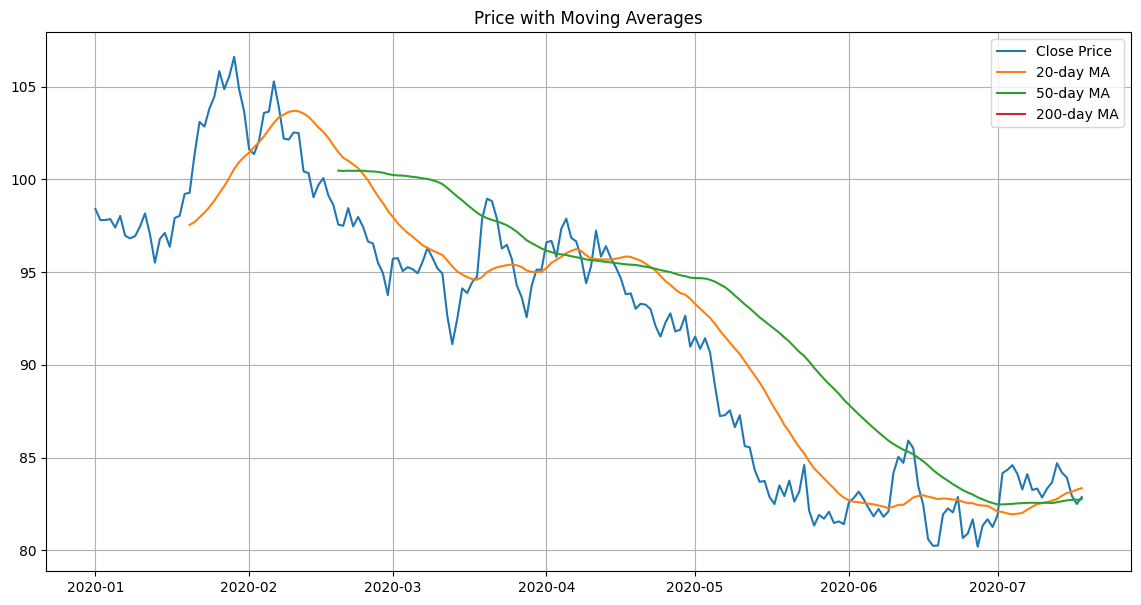

In [4]:
# Calculate Moving Averages
ma_20 = analyzer.calculate_moving_average(20)
ma_50 = analyzer.calculate_moving_average(50)
ma_200 = analyzer.calculate_moving_average(200)

# Plot price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(price_data.index, price_data['close'], label='Close Price')
plt.plot(price_data.index, ma_20, label='20-day MA')
plt.plot(price_data.index, ma_50, label='50-day MA')
plt.plot(price_data.index, ma_200, label='200-day MA')
plt.title('Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

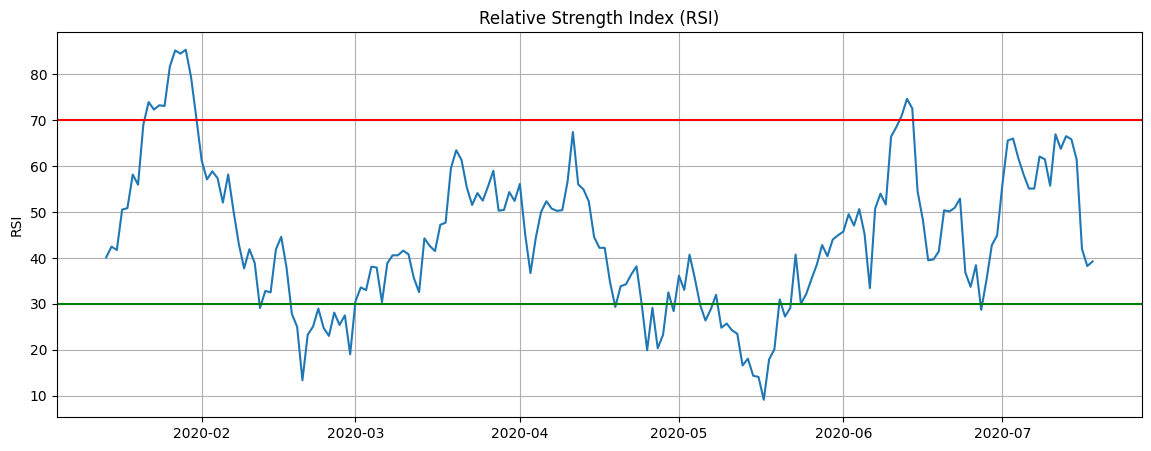

In [5]:
# Calculate RSI
rsi = analyzer.calculate_rsi()

# Plot RSI
plt.figure(figsize=(14, 5))
plt.plot(price_data.index, rsi)
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.grid(True)
plt.show()

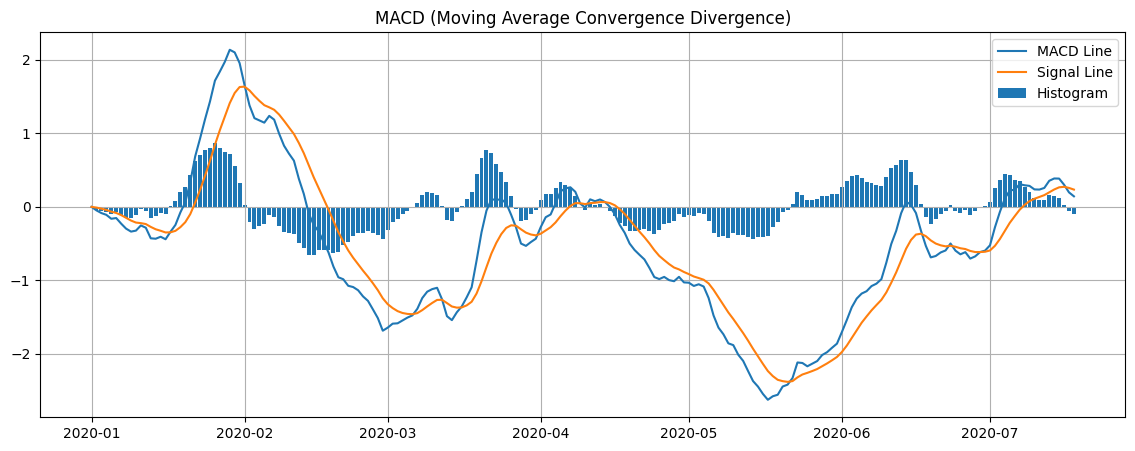

In [6]:
# Calculate MACD
macd_line, signal_line, histogram = analyzer.calculate_macd()

# Plot MACD
plt.figure(figsize=(14, 5))
plt.plot(price_data.index, macd_line, label='MACD Line')
plt.plot(price_data.index, signal_line, label='Signal Line')
plt.bar(price_data.index, histogram, label='Histogram')
plt.title('MACD (Moving Average Convergence Divergence)')
plt.legend()
plt.grid(True)
plt.show()

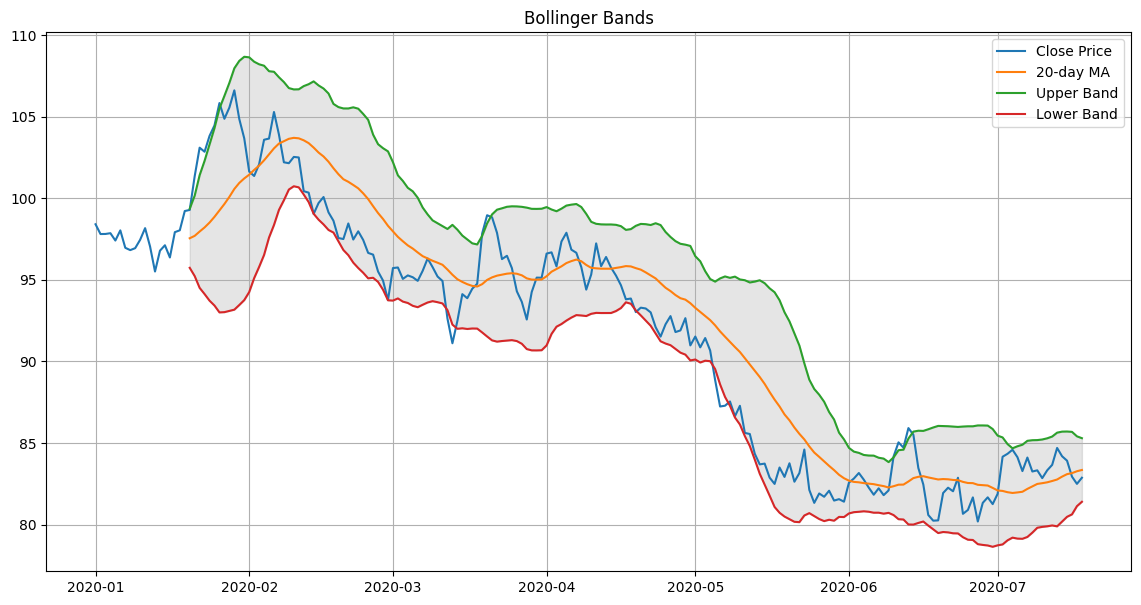

In [7]:
# Calculate Bollinger Bands
middle_band, upper_band, lower_band = analyzer.calculate_bollinger_bands()

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(price_data.index, price_data['close'], label='Close Price')
plt.plot(price_data.index, middle_band, label='20-day MA')
plt.plot(price_data.index, upper_band, label='Upper Band')
plt.plot(price_data.index, lower_band, label='Lower Band')
plt.fill_between(price_data.index, upper_band, lower_band, color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()

## Trend Detection

Let's detect trends in our price data using the built-in trend detection functionality.

In [ ]:
# Calculate all indicators if not already done
analyzer.calculate_all_indicators()

# Detect trend
trend_result = analyzer.detect_trend()
print(f"\nTrend Detection Results:")
print(f"Direction: {trend_result['direction']}")
print(f"Strength: {trend_result['strength']}")
print(f"\nDetailed Signals:")
for signal_type, signal_value in trend_result['signals'].items():
    print(f"  - {signal_type}: {signal_value}")

## Validation

Let's validate our calculated indicators to ensure they meet expected properties.

In [ ]:
validation_results = analyzer.validate_indicators()
print("Validation Results:")
for indicator, result in validation_results.items():
    print(f"{indicator}: {result}")

## Conclusion

In this notebook, we've demonstrated how to use the TechnicalAnalyzer class to calculate and visualize various technical indicators. These indicators can help identify trends, potential reversal points, and overall market conditions.

Key indicators we explored:
- Moving Averages (20, 50, and 200-day)
- Relative Strength Index (RSI)
- Moving Average Convergence Divergence (MACD)
- Bollinger Bands

The TechnicalAnalyzer also provides functionality to detect trends and validate the calculated indicators.